# Part 1: Underfitting and Overfitting in a classification task 

## Setup

In [2]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data 


In [22]:
#  MNIST 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 

print('Input data (images) shape as imported from the MNIST dataset ', x_train[0].shape)

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Input data (images) after adding extra dimension to indicate the number of channels:", x_train[0].shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#ADDED to check the format of labels (integers from 0 to 9) before preprocessing (one hot encoding)

print('Randomly picked label (from the training set) before one hot encoding: ', y_train[0])

# convert class vectors to binary class matrices             
y_train = keras.utils.to_categorical(y_train, num_classes)  
y_test = keras.utils.to_categorical(y_test, num_classes) # each numerical/categorical value is represented as a binary vector

#ADDED to check the format of labels (integers from 0 to 9) after preprocessing (one hot encoding)

print('Same randomly picked label (from the training set) after one hot encoding: ',y_train[0])

Input data (images) shape as imported from the MNIST dataset  (28, 28)
Input data (images) after adding extra dimension to indicate the number of channels: (28, 28, 1)
60000 train samples
10000 test samples
Randomly picked label (from the training set) before one hot encoding:  5
Same randomly picked label (from the training set) after one hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


![](imgs/one_hot.png)

# Added for image data visualization

<IPython.core.display.Javascript object>


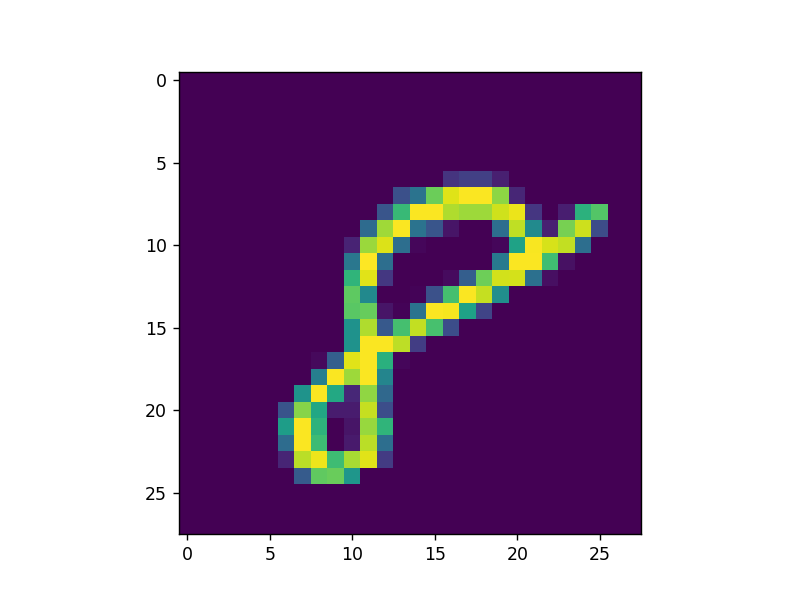

In [31]:
import matplotlib.pyplot as plt #
%matplotlib notebook

n=-1 #visualize random image in the training set. So 'n' goes from 0 to 59999
plt.imshow(x_train[n,:,:,0]) #* default colormap 'viridis'. Check cmap="" options. grayscale= gray

# Visualization of the architecure

![](imgs/cnn.png)


## Valid padding:
![SegmentLocal](imgs/valid.gif "segment")

## Same padding:
![SegmentLocal](imgs/Same_padding.gif "segment")


# Build the model

In [36]:
model = keras.Sequential( 
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),  
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),# * recall softmax. *Show images
    ]
)

model.summary()

#Parameters
# 832= 5x5x32+32
# 51264= 5x5x32x64+64
# 10250= 1024x10+10

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

## Softmax activation 
<img src="imgs/Softmax.png">


<img src="imgs/cce_loss.png">


##  Categorical cross entropy 
<img src="imgs/CategoricalCrossentropy.png">



# Compile the model

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 


# Training the model

In [37]:

history= model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2) 

Epoch 1/15
375/375 [==============================] - 19s 49ms/step - loss: 0.2733 - accuracy: 0.9239 - val_loss: 0.1050 - val_accuracy: 0.9678
Epoch 2/15
375/375 [==============================] - 18s 49ms/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0650 - val_accuracy: 0.9812
Epoch 3/15
375/375 [==============================] - 19s 50ms/step - loss: 0.0540 - accuracy: 0.9838 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 4/15
375/375 [==============================] - 18s 48ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0480 - val_accuracy: 0.9859
Epoch 5/15
375/375 [==============================] - 18s 48ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0430 - val_accuracy: 0.9880
Epoch 6/15
375/375 [==============================] - 18s 49ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0396 - val_accuracy: 0.9884
Epoch 7/15
375/375 [==============================] - 18s 49ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0445 - val_accuracy:

# Evaluate the model

In [9]:

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.019479156361361674
Test accuracy: 0.9931


# Visualization of the loss evolution during training

<IPython.core.display.Javascript object>


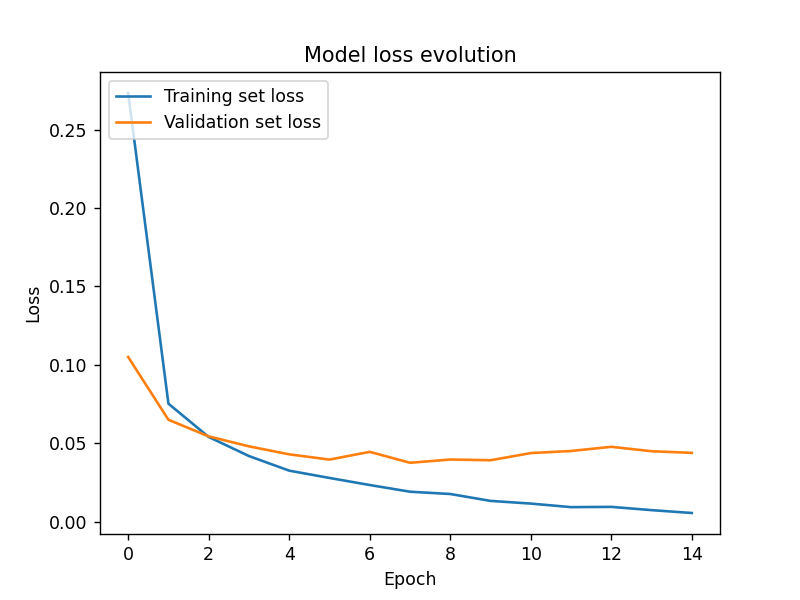

In [40]:
# 
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('Model loss evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set loss', 'Validation set loss'], loc='upper left')
plt.show()

plt.savefig('Loss vs Epochs Plot.png')

#  Visualization of the classification accuracy during training

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>


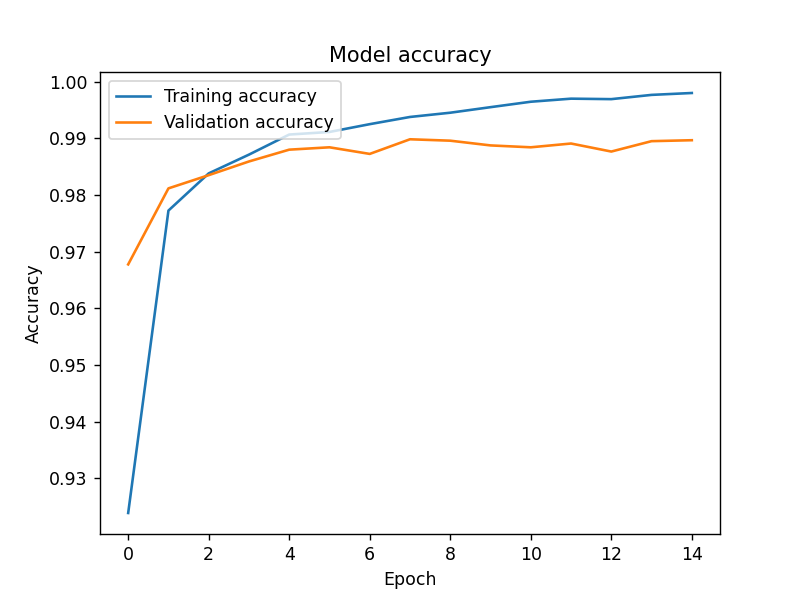

In [41]:
# list the keys of the dictionary stored in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

plt.savefig('Accuracy vs Epochs Plot.png')

# Save and load weights 

In [42]:
#Save the weights of the just trained model in the default directory
model.save_weights('Example2.h5')
model.load_weights('Example2.h5')

# Visualize individual predictions

<IPython.core.display.Javascript object>


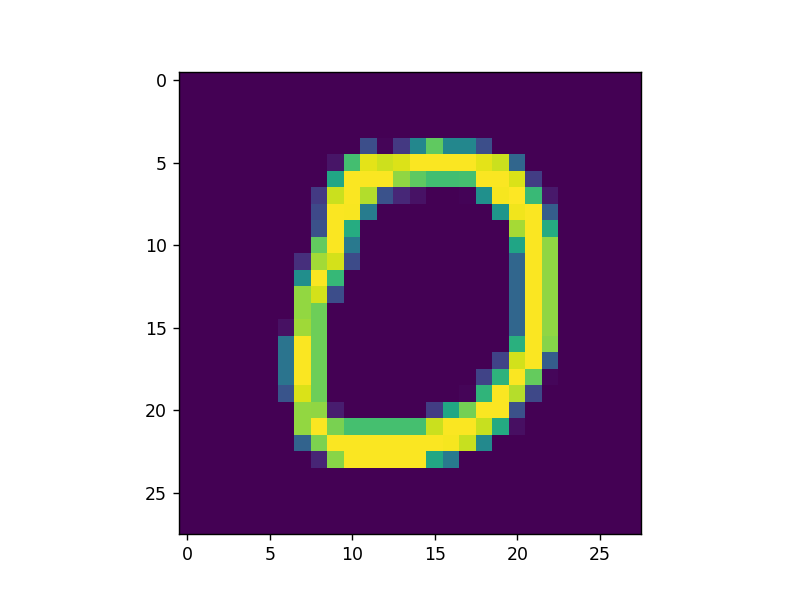


Ground-truth:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

   Predicted:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [57]:
index=10 #index of a randomly picked sample to make a prediction inside the test set (any number from 0 to 9999)
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred=model.predict(x_test, verbose=0)
y_pred_i=y_pred[index]
print("\n   Predicted: ",np.round(y_pred_i, decimals=3)) 


# Induce underfitting 


In [52]:
model2 = keras.Sequential( 
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(1, kernel_size=(5, 5), activation="relu"), 
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(1, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 1)         26        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 1)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 1)           26        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 1)          0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [53]:

# Compile model
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
# Fit the model
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2) 


Epoch 1/15
375/375 [==============================] - 6s 14ms/step - loss: 1.8778 - accuracy: 0.3547 - val_loss: 1.2439 - val_accuracy: 0.6026
Epoch 2/15
375/375 [==============================] - 5s 14ms/step - loss: 1.0753 - accuracy: 0.6498 - val_loss: 0.9092 - val_accuracy: 0.7031
Epoch 3/15
375/375 [==============================] - 5s 14ms/step - loss: 0.8624 - accuracy: 0.7195 - val_loss: 0.7813 - val_accuracy: 0.7478
Epoch 4/15
375/375 [==============================] - 5s 14ms/step - loss: 0.7644 - accuracy: 0.7559 - val_loss: 0.7124 - val_accuracy: 0.7746
Epoch 5/15
375/375 [==============================] - 5s 13ms/step - loss: 0.7108 - accuracy: 0.7740 - val_loss: 0.6699 - val_accuracy: 0.7898
Epoch 6/15
375/375 [==============================] - 5s 13ms/step - loss: 0.6745 - accuracy: 0.7849 - val_loss: 0.6382 - val_accuracy: 0.7984
Epoch 7/15
375/375 [==============================] - 5s 13ms/step - loss: 0.6461 - accuracy: 0.7944 - val_loss: 0.6076 - val_accuracy: 0.8087

<IPython.core.display.Javascript object>


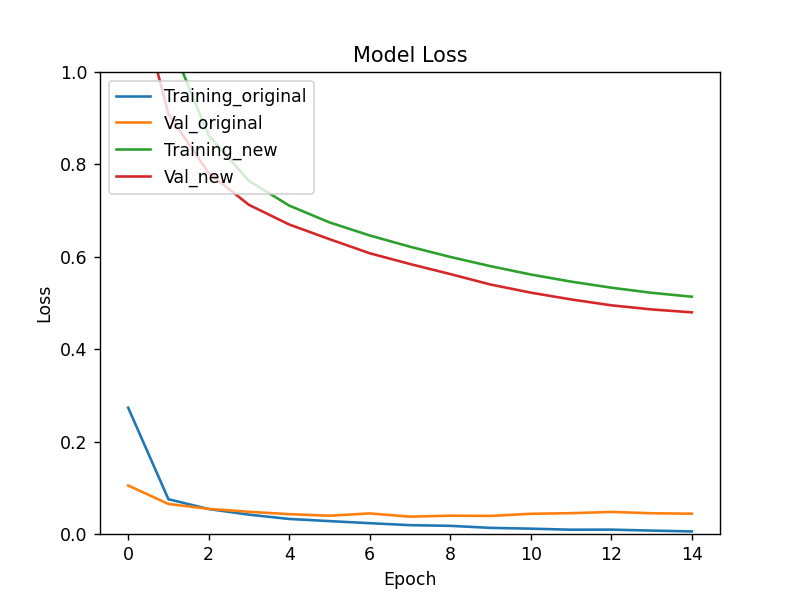

In [54]:

# summarize history for loss in training and validation sets to assess Overfitting-Underfitting
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.plot(history2.history['loss']) #
plt.plot(history2.history['val_loss'])
plt.legend(['Training_original', 'Val_original','Training_new', 'Val_new'], loc='upper left')
plt.ylim(0,1)
plt.show()
#

<IPython.core.display.Javascript object>


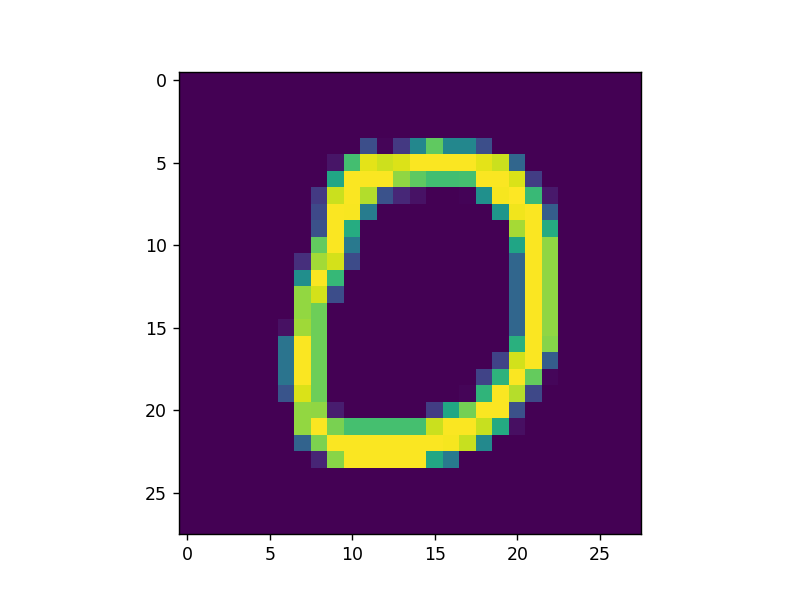


Ground-truth:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

   Predicted:  [0.98  0.    0.006 0.    0.    0.014 0.    0.    0.    0.   ]


In [58]:
index=10 #index of a randomly picked sample to make a prediction inside the test set (any number from 0 to 9999)
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred=model2.predict(x_test, verbose=0)
y_pred_i=y_pred[index]
print("\n   Predicted: ",np.round(y_pred_i, decimals=3)) 



# Induce overfitting


In [64]:
model3 = keras.Sequential( 
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),  
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [65]:

# Compile model
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # a function used to judge the performance of model
# Fit the model
history3 = model3.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.999) # Calculates how often predictions equal labels


Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 2.3182 - accuracy: 0.0500 - val_loss: 2.2628 - val_accuracy: 0.2158
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 2.2341 - accuracy: 0.2667 - val_loss: 2.2302 - val_accuracy: 0.3356
Epoch 3/30
1/1 [==============================] - 4s 4s/step - loss: 2.1628 - accuracy: 0.5167 - val_loss: 2.1990 - val_accuracy: 0.3415
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 2.0925 - accuracy: 0.5000 - val_loss: 2.1665 - val_accuracy: 0.3410
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 2.0186 - accuracy: 0.4833 - val_loss: 2.1307 - val_accuracy: 0.3554
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 1.9397 - accuracy: 0.5167 - val_loss: 2.0874 - val_accuracy: 0.3807
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 1.8556 - accuracy: 0.5500 - val_loss: 2.0321 - val_accuracy: 0.4027
Epoch 8/30
1/1 [=========================

<IPython.core.display.Javascript object>


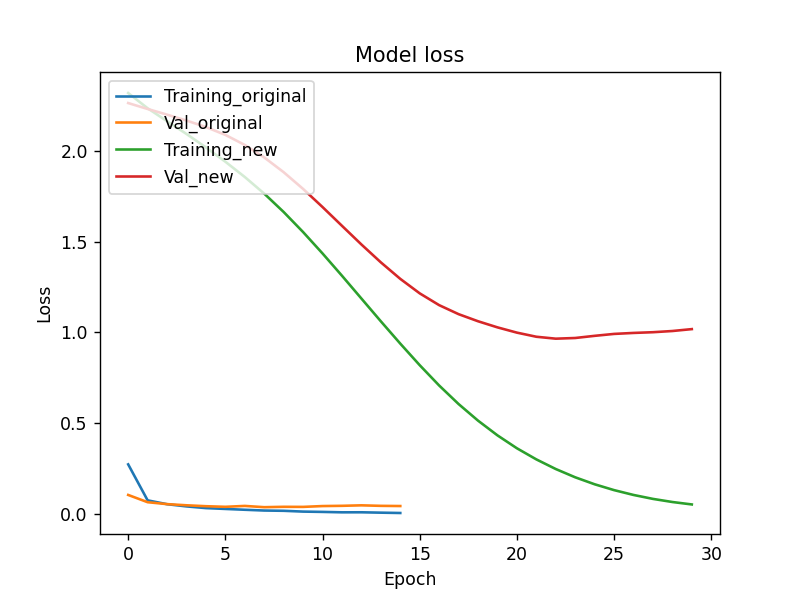

In [66]:
import matplotlib.pyplot as plt 
%matplotlib notebook 

# summarize history for loss in training and validation sets to assess Overfitting-Underfitting
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.plot(history3.history['loss']) #
plt.plot(history3.history['val_loss'])
plt.legend(['Training_original', 'Val_original','Training_new', 'Val_new'], loc='upper left')
plt.show()



<IPython.core.display.Javascript object>


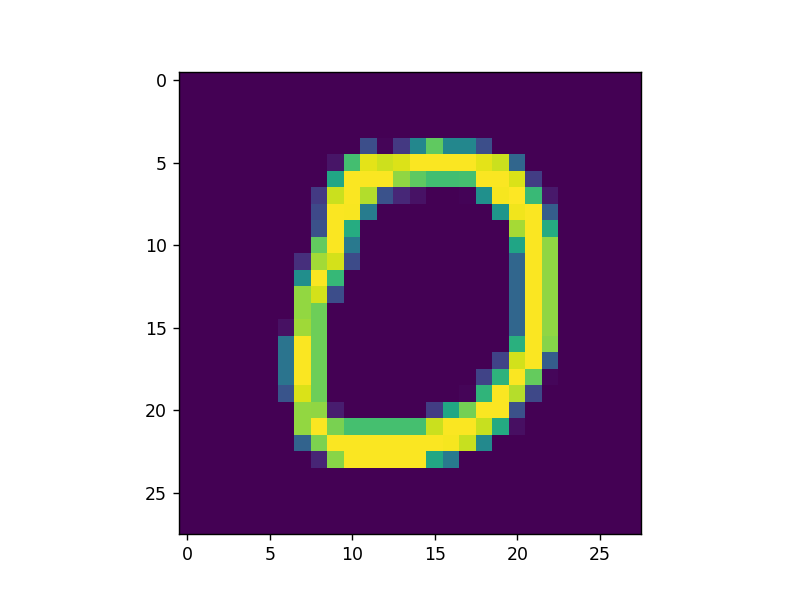


Ground-truth:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

   Predicted:  [0.99  0.    0.009 0.    0.    0.    0.    0.    0.    0.   ]


In [67]:
index=10 #index of a randomly picked sample to make a prediction inside the test set
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred=model3.predict(x_test, verbose=0)
y_pred_i=y_pred[index]
print("\n   Predicted: ",np.round(y_pred_i, decimals=3))

# Part 2: Run previous example as a Regression Task
### 1. Do not one-hot encode the labels, instead use the original numeric integer labels
### 2. Substitute output layer of neurons(num_classes) to one single output neuron and change the activation from softmax to linear
### 3. Use a different Loss: Mean Squared Error (Regression)
<img src="files/imgs/MSE.png">

In [69]:



#  MNIST 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 

print('Input data (images) shape as imported from the MNIST dataset ', x_train[0].shape)

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Input data (images) after adding extra dimension to indicate the number of channels:", x_train[0].shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#ADDED to check the format of labels (integers from 0 to 9) 

print('Randomly picked label (from the training set) : ',y_train[0])

Input data (images) shape as imported from the MNIST dataset  (28, 28)
Input data (images) after adding extra dimension to indicate the number of channels: (28, 28, 1)
60000 train samples
10000 test samples
Randomly picked label (from the training set) :  5


# Build a model with single output neuron and linear activation

In [71]:
model4 = keras.Sequential( #each layer has exactly one input tensor and one output tensor * show in Keras vs. Functional
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"), 
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="linear"),
    ]
)

model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                

# Arguments associated to the selected Optimizer

In [73]:
opt=keras.optimizers.Adam(
    learning_rate=0.005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

model4.compile(loss="mean_squared_error", optimizer=opt) # a function used to judge the performance of model


In [74]:

history4= model4.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2) 

Epoch 1/30
375/375 [==============================] - 18s 46ms/step - loss: 2.0860 - val_loss: 0.9024
Epoch 2/30
375/375 [==============================] - 18s 48ms/step - loss: 0.8660 - val_loss: 0.8648
Epoch 3/30
375/375 [==============================] - 18s 48ms/step - loss: 0.6907 - val_loss: 0.6770
Epoch 4/30
375/375 [==============================] - 19s 50ms/step - loss: 0.6134 - val_loss: 0.6079
Epoch 5/30
375/375 [==============================] - 17s 44ms/step - loss: 0.5454 - val_loss: 0.6053
Epoch 6/30
375/375 [==============================] - 17s 45ms/step - loss: 0.5073 - val_loss: 0.5908
Epoch 7/30
375/375 [==============================] - 17s 45ms/step - loss: 0.4840 - val_loss: 0.5761
Epoch 8/30
375/375 [==============================] - 18s 47ms/step - loss: 0.4599 - val_loss: 0.5341
Epoch 9/30
375/375 [==============================] - 18s 47ms/step - loss: 0.4362 - val_loss: 0.5454
Epoch 10/30
375/375 [==============================] - 17s 44ms/step - loss: 0.410

In [75]:
#Evaluate the model in the Test set made of 10000 images and compute average loss
score = model4.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score)

Test loss: 0.530856192111969


<IPython.core.display.Javascript object>


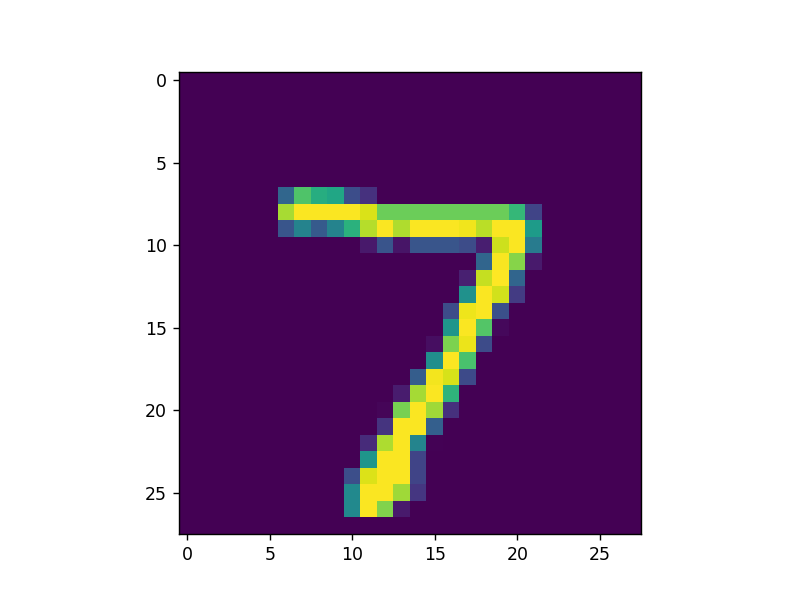


Ground-truth:  7

   Predicted:  [6.931]


In [79]:
index=0 #index of a randomly picked sample to make a predcition inside the test set
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred=model4.predict(x_test, verbose=0)
y_pred_i=y_pred[index]
print("\n   Predicted: ",np.round(y_pred_i, decimals=3))


<IPython.core.display.Javascript object>


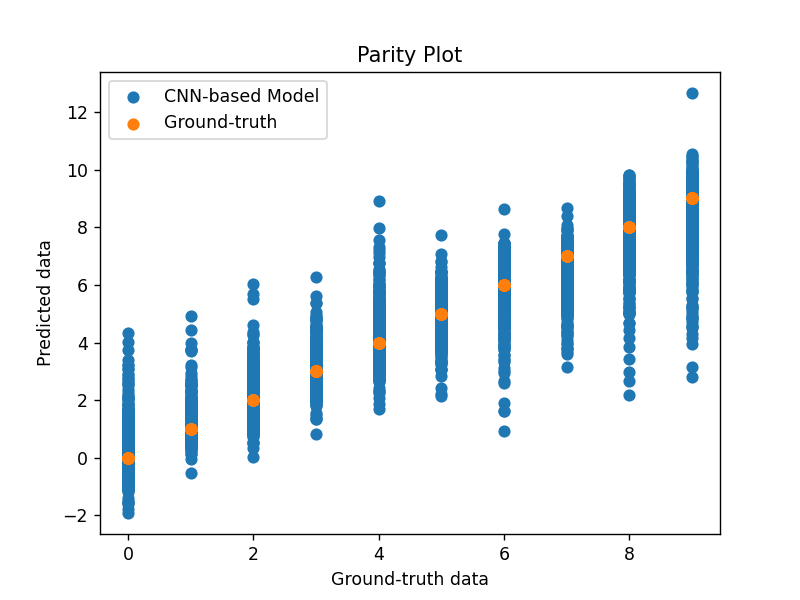

In [85]:
plt.scatter(y_test,y_pred,label='CNN-based Model')
plt.scatter(y_test,y_test,label='Ground-truth')
plt.xlabel('Ground-truth data')
plt.ylabel('Predicted data')
plt.title('Parity Plot')
plt.legend()
plt.show()
